In [ ]:
#Script for analyzing results of multivalue conversion and autoamtically create metadata
#Requires temp/multi.meta

6 datasets
5 converted


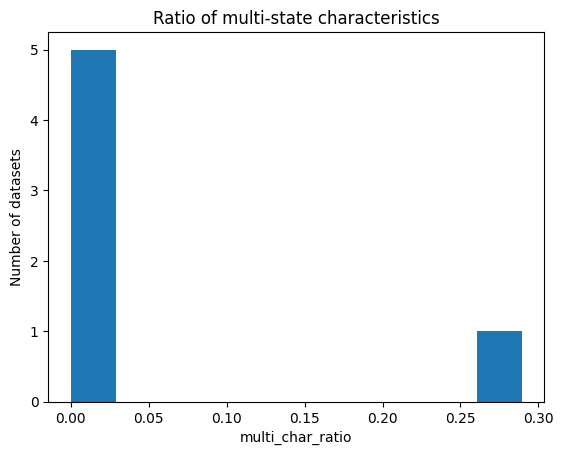

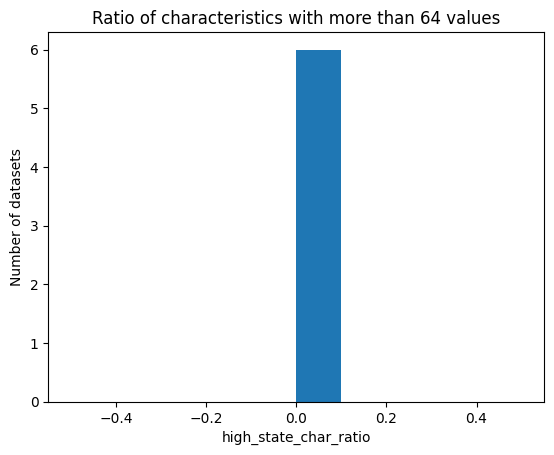

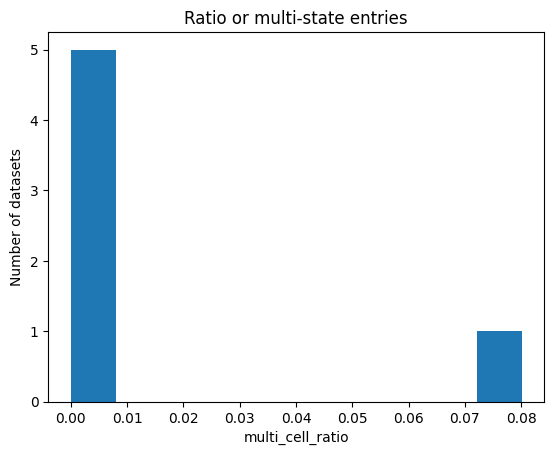

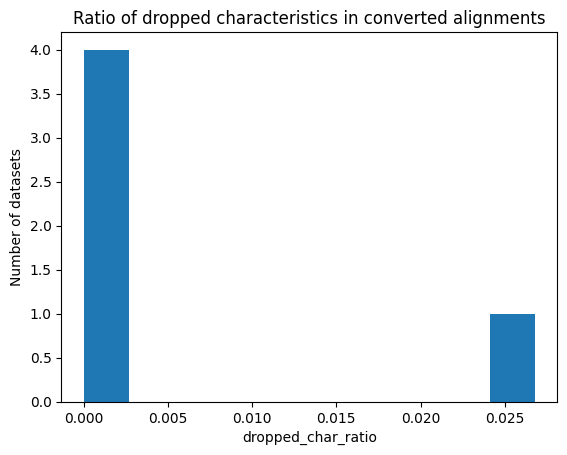

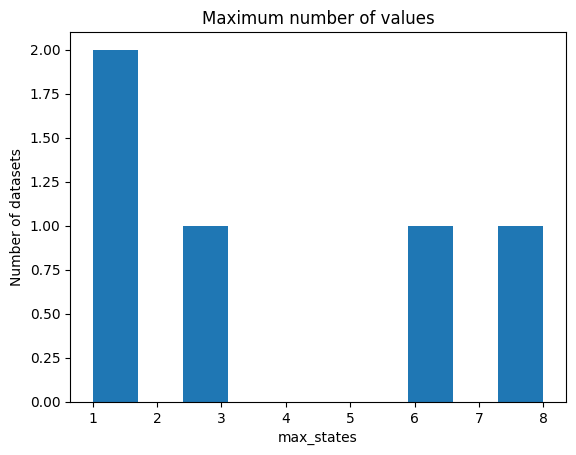

In [9]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
from plotly import graph_objects as go
from plotly.subplots import make_subplots

database = "cldf_morpho"
ts = ["mp", "ms"]

df = pd.read_csv("temp/" + database + "_multi.meta")
df["multi_char_ratio"] = df["multi_chars"] / df["num_chars"]
df["high_multi_char_ratio"] = df["high_multi_chars"] / df["num_chars"]
df["high_state_char_ratio"] = df["high_state_chars"] / df["num_chars"]
df["dropped_char_ratio"] = df["dropped_chars"] / df["num_chars"]
df["multi_cell_ratio"] = df["multi_cells"] / (df["num_chars"] * df["num_languages"])

converted_df = df.groupby(df.converted).get_group(1)



def plots_for_column(col, converted_only=False, title=""):
    plt.title(title)
    plt.ylabel("Number of datasets")
    plt.xlabel(col)
    if converted_only:
        plt.hist(converted_df[col])
    else:
        plt.hist(df[col])
    plt.show()


print(str(len(df)) + " datasets")
print(str(len(converted_df)) + " converted")
plots_for_column("multi_char_ratio", False, "Ratio of multi-state characteristics")
plots_for_column("high_state_char_ratio", False, "Ratio of characteristics with more than 64 values")
plots_for_column("multi_cell_ratio", False, "Ratio or multi-state entries")


plots_for_column("dropped_char_ratio", True, "Ratio of dropped characteristics in converted alignments")
plots_for_column("max_states", True, "Maximum number of values")
    

In [10]:
existing_metadata_path = "metadata"
new_metadata_path = "alignment_uploads/metadata"
for i, row in converted_df.iterrows():
    name = row["name"]
    for t in ts:
        file_name_old = os.path.join(existing_metadata_path, name + ".BIN." + t + ".json")
        if os.path.isfile(file_name_old):
            json_string = open(file_name_old, "r").read()
            break
    j = json.loads(json_string)
    j['model'] = 'MULTI'
    j['max_states'] = row["max_states"]
    file_name_new = os.path.join(new_metadata_path, name + ".MULTI." + t + ".json")
    with open(file_name_new, "w") as outfile:
        json.dump(j, outfile)


        
    